# A real problem: Classify MNIST Digits

In this code tutorial we will learn how to quickly train a model to understand some of PyTorch's basic building blocks to train a deep learning model. This notebook is inspired by the ["Tensorflow 2.0 Quickstart for experts"](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb#scrollTo=DUNzJc4jTj6G) notebook. 

**Complete Code Walkthrough:** [Blog post](https://medium.com/dair-ai/pytorch-1-2-quickstart-with-google-colab-6690a30c38d)

In [1]:
#@title Import Dependencies

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
#@title Define Hyperparameters

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 32 # the size of input data took for one iteration
lr = 1e-3 # size of step 

# Importing the MNIST data
The first step before training the model is to import the data. We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which is like the Hello World dataset of machine learning. 

Besides importing the data, we will also do a few more things:
- We will tranform the data into tensors using the `transforms` module
- We will use `DataLoader` to build convenient data loaders or what are referred to as iterators, which makes it easy to efficiently feed data in batches to deep learning models. 
- As hinted above, we will also create batches of the data by setting the `batch` parameter inside the data loader. Notice we use batches of `32` in this tutorial but you can change it to `64` if you like. I encourage you to experiment with different batches.

In [3]:
#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

In [4]:
#@title Loading the data

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

## Exploring the Data
As a practioner and researcher, I am always spending a bit of time and effort exploring and understanding the dataset. It's fun and this is a good practise to ensure that everything is in order. 

Let's check what the train and test dataset contains. I will use `matplotlib` to print out some of the images from our dataset. 

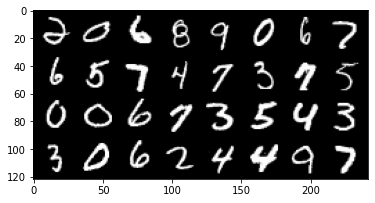

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_gen)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [6]:
#@title Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [7]:
#@title Build the model

net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [8]:
#@title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

In [9]:
#@title Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = images.view(-1,28*28).cuda()
    labels = labels.cuda()
    
    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

Epoch [1/20], Step [100/1875], Loss: 0.3054
Epoch [1/20], Step [200/1875], Loss: 0.4577
Epoch [1/20], Step [300/1875], Loss: 0.2608
Epoch [1/20], Step [400/1875], Loss: 0.0808
Epoch [1/20], Step [500/1875], Loss: 0.3517
Epoch [1/20], Step [600/1875], Loss: 0.0635
Epoch [1/20], Step [700/1875], Loss: 0.0943
Epoch [1/20], Step [800/1875], Loss: 0.1465
Epoch [1/20], Step [900/1875], Loss: 0.1795
Epoch [1/20], Step [1000/1875], Loss: 0.2426
Epoch [1/20], Step [1100/1875], Loss: 0.1378
Epoch [1/20], Step [1200/1875], Loss: 0.0691
Epoch [1/20], Step [1300/1875], Loss: 0.2010
Epoch [1/20], Step [1400/1875], Loss: 0.5089
Epoch [1/20], Step [1500/1875], Loss: 0.0200
Epoch [1/20], Step [1600/1875], Loss: 0.1021
Epoch [1/20], Step [1700/1875], Loss: 0.0222
Epoch [1/20], Step [1800/1875], Loss: 0.0838
Epoch [2/20], Step [100/1875], Loss: 0.0616
Epoch [2/20], Step [200/1875], Loss: 0.0365
Epoch [2/20], Step [300/1875], Loss: 0.0282
Epoch [2/20], Step [400/1875], Loss: 0.0731
Epoch [2/20], Step [500

Epoch [11/20], Step [500/1875], Loss: 0.1535
Epoch [11/20], Step [600/1875], Loss: 0.0001
Epoch [11/20], Step [700/1875], Loss: 0.0003
Epoch [11/20], Step [800/1875], Loss: 0.0049
Epoch [11/20], Step [900/1875], Loss: 0.0011
Epoch [11/20], Step [1000/1875], Loss: 0.0001
Epoch [11/20], Step [1100/1875], Loss: 0.0007
Epoch [11/20], Step [1200/1875], Loss: 0.0003
Epoch [11/20], Step [1300/1875], Loss: 0.0008
Epoch [11/20], Step [1400/1875], Loss: 0.0002
Epoch [11/20], Step [1500/1875], Loss: 0.0171
Epoch [11/20], Step [1600/1875], Loss: 0.0017
Epoch [11/20], Step [1700/1875], Loss: 0.0013
Epoch [11/20], Step [1800/1875], Loss: 0.0033
Epoch [12/20], Step [100/1875], Loss: 0.0005
Epoch [12/20], Step [200/1875], Loss: 0.0338
Epoch [12/20], Step [300/1875], Loss: 0.0061
Epoch [12/20], Step [400/1875], Loss: 0.0280
Epoch [12/20], Step [500/1875], Loss: 0.0220
Epoch [12/20], Step [600/1875], Loss: 0.0055
Epoch [12/20], Step [700/1875], Loss: 0.0173
Epoch [12/20], Step [800/1875], Loss: 0.0027
E

In [10]:
#@title Evaluating the accuracy of the model

correct = 0
total = 0
for images,labels in test_gen:
  images = images.view(-1,28*28).cuda()
  labels = labels.cuda()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Accuracy of the model: %.3f %%' %((100*correct.item())/(total+1)))

Accuracy of the model: 98.060 %
